# Homework 5
This homework requires `wine.csv`, and the `tidyverse` and `Rtsne` packages. Install them if you haven't already!  
See the following link for how to add new packages to Binder: https://github.com/rjenki/BIOS512?tab=readme-ov-file#adding-packages-to-installr-later.   
**For readability and easier processing, please make each question part a different code chunk.**

In [1]:
library(tidyverse)
library(Rtsne)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Question 1  

#### a) Import your data.  
#### b) Check out the columns present using one of R's data frame summary.  
#### c) Get summary statistics on the numeric variables.  

In [2]:
wine <- read.csv("wine.csv")


In [3]:
names(wine)

[1] "Alcohol"                       "Malicacid"                    
 [3] "Ash"                           "Alcalinity_of_ash"            
 [5] "Magnesium"                     "Total_phenols"                
 [7] "Flavanoids"                    "Nonflavanoid_phenols"         
 [9] "Proanthocyanins"               "Color_intensity"              
[11] "Hue"                           "X0D280_0D315_of_diluted_wines"
[13] "Proline"                       "class"

In [4]:
summary(wine)

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

## Question 2

#### a) Scale and center your data  
*Hint:* Use a `mutate()` statement across all columns **except class** with `function(x) as.numeric(scale(x))`.

#### b) Based on what you saw in the summary statistic table from the imported data, why would scaling and centering this data be helpful before we perform PCA?


In [6]:
wine_scaled <- wine %>%
  mutate(across(-class, ~ as.numeric(scale(.x))))
wine_scaled

Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,X0D280_0D315_of_diluted_wines,Proline,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1.51434077,-0.56066822,0.23139979,-1.16630317,1.90852151,0.8067217,1.0319081,-0.65770780,1.22143845,0.251008784,0.3611585,1.84272147,1.01015939,1
0.24559683,-0.49800856,-0.82566722,-2.48384052,0.01809398,0.5670481,0.7315653,-0.81841060,-0.54318872,-0.292496232,0.4049085,1.11031723,0.96252635,1
0.19632522,0.02117152,1.10621386,-0.26798225,0.08810981,0.8067217,1.2121137,-0.49700500,2.12995937,0.268262912,0.3174085,0.78636920,1.39122370,1
1.68679140,-0.34583508,0.48655389,-0.80697481,0.92829983,2.4844372,1.4623994,-0.97911340,1.02925134,1.182731669,-0.4263410,1.18074072,2.32800680,1
0.29486844,0.22705328,1.83522559,0.45067448,1.27837900,0.8067217,0.6614853,0.22615759,0.40027531,-0.318377423,0.3611585,0.44833648,-0.03776747,1
1.47738706,-0.51591132,0.30430096,-1.28607930,0.85828399,1.5576991,1.3622851,-0.17559941,0.66234866,0.729810822,0.4049085,0.33565890,2.23274072,1
1.71142720,-0.41744613,0.30430096,-1.46574348,-0.26196936,0.3273744,0.4912911,-0.49700500,0.67982021,0.082781041,0.2736585,1.36384178,1.72465497,1
1.30493643,-0.16680747,0.88751034,-0.56742256,1.48842650,0.4871569,0.4812796,-0.41665360,-0.59560339,-0.003489596,0.4486584,1.36384178,1.74053265,1
2.25341491,-0.62332789,-0.71631546,-1.64540766,-0.19195352,0.8067217,0.9518167,-0.57735640,0.67982021,0.061213382,0.5361584,0.33565890,0.94664867,1


#b

- Scaling and centering is necessary because variables with larger numeric ranges dominate the principal components. Some variables had much larger scales and by centering, every variable contributes equally to have the same differences instead of just in measurement units.

## Question 3

#### a) Perform PCA

#### b) How much of the total variance is explained by PC1? PC2? What function do we use to see that information?

#### c) Why are we doing PCA first?

#### d) What is the rotation matrix? Print it explicitly.  
*Hint:* Check the notes for a simple way to do this!

#### e) Plot PC1 vs. PC2, using the wine class as labels for coloring.  
*Hint:* You'll first need a data set with only PC1 and PC2, then add back the class variable from your scaled data set with a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### f) What do you see after plotting PC1 vs. PC2? What does this mean in context of wine classes?

#### g) Give an example of data where PCA would fail. You can describe the data or do a simulation.  
*Hint:* Our notes have a few examples!

#### h) Explain the difference between vector space and manifold, and how these terms apply to what we did/will do with T-SNE.


In [7]:
#3a
wine_pca <- prcomp(wine_scaled); # runs PCA on d
wine_pca

Standard deviations (1, .., p=14):
 [1] 2.2797841 1.5802028 1.2025279 0.9608805 0.9317684 0.8131917 0.7435811
 [8] 0.5910663 0.5401830 0.5078404 0.4752135 0.4108322 0.3424757 0.2085970

Rotation (n x k) = (14 x 14):
                                       PC1          PC2           PC3
Alcohol                       -0.139554110 -0.483986584 -0.2073937774
Malicacid                      0.231278771 -0.224052306  0.0888801156
Ash                           -0.000758731 -0.315929724  0.6261495205
Alcalinity_of_ash              0.230293094  0.011263089  0.6120248225
Magnesium                     -0.131041028 -0.300236426  0.1308963493
Total_phenols                 -0.372792367 -0.066404359  0.1463803150
Flavanoids                    -0.403237284  0.002017377  0.1508538950
Nonflavanoid_phenols           0.278847444 -0.027604752  0.1701277248
Proanthocyanins               -0.291925075 -0.040561908  0.1497147503
Color_intensity                0.089426322 -0.529856997 -0.1372817801
Hue           

#3b
- PC1: 0.3821
- PC2: 0.1836
- Function: summary(wine_pca)

In [8]:
summary(wine_pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.2798 1.5802 1.2025 0.96088 0.93177 0.81319 0.74358
Proportion of Variance 0.3821 0.1836 0.1063 0.06789 0.06383 0.04862 0.04065
Cumulative Proportion  0.3821 0.5657 0.6721 0.73995 0.80378 0.85241 0.89306
                           PC8     PC9    PC10   PC11    PC12    PC13   PC14
Standard deviation     0.59107 0.54018 0.50784 0.4752 0.41083 0.34248 0.2086
Proportion of Variance 0.02569 0.02145 0.01896 0.0166 0.01241 0.00862 0.0032
Cumulative Proportion  0.91875 0.94020 0.95916 0.9758 0.98818 0.99680 1.0000

#3c
- PCA is done first to reduce dimensionality and to understand which axis the data is being aligned with. This is a processing method used to make sure the patterns in the data can be seen.

In [12]:
#3d
wine_pca$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Alcohol,-0.139554110,-0.483986584,-0.2073937774,-0.05202454,0.26128775,0.16536102,0.08109663,0.41085968,-0.48056233,0.26657031,-0.22307817,-0.265240813,0.02620159,-0.082231639
Malicacid,0.231278771,-0.224052306,0.0888801156,0.50792619,0.09224016,0.58008658,-0.38986636,0.07811783,0.03061612,-0.32214644,0.07118746,0.120491970,-0.04853550,0.025647729
Ash,-0.000758731,-0.315929724,0.6261495205,-0.23483910,0.12056093,0.12592437,0.16145692,-0.17151142,0.28629906,-0.08144576,-0.49601658,-0.047383556,0.17320790,-0.014819695
Alcalinity_of_ash,0.230293094,0.011263089,0.6120248225,0.06750549,-0.05695664,-0.09534441,0.27494282,0.42011625,-0.15910053,0.11386621,0.47628860,-0.058460009,-0.15775842,0.099229101
Magnesium,-0.131041028,-0.300236426,0.1308963493,-0.25528136,-0.75961835,0.10479264,-0.32783323,-0.15219546,-0.26275246,0.10095846,0.07123668,0.061706989,-0.05861093,-0.013969977
Total_phenols,-0.372792367,-0.066404359,0.1463803150,0.19504272,0.14215523,-0.12544691,0.03482640,-0.38223991,-0.35387300,-0.32340394,0.29983404,-0.302432020,0.41707864,0.169545891
Flavanoids,-0.403237284,0.002017377,0.1508538950,0.14885364,0.10784345,-0.04674972,0.06557152,-0.18072307,-0.07250367,-0.15083796,-0.02996008,-0.046369111,-0.71106740,-0.452804254
Nonflavanoid_phenols,0.278847444,-0.027604752,0.1701277248,-0.27078415,0.47058669,-0.25340042,-0.60671679,-0.23206171,-0.17571862,0.23033372,0.12026342,0.042506815,-0.08908413,-0.058790535
Proanthocyanins,-0.291925075,-0.040561908,0.1497147503,0.43527140,-0.12361143,-0.49254225,-0.40687583,0.35471193,0.24105395,0.12403042,-0.23448023,-0.094480759,0.11423370,0.039562012
Color_intensity,0.089426322,-0.529856997,-0.1372817801,0.06919472,0.05497895,-0.42598886,0.19989161,-0.03762399,-0.06894372,-0.24930845,0.02389587,0.601198625,-0.08479641,0.160155281


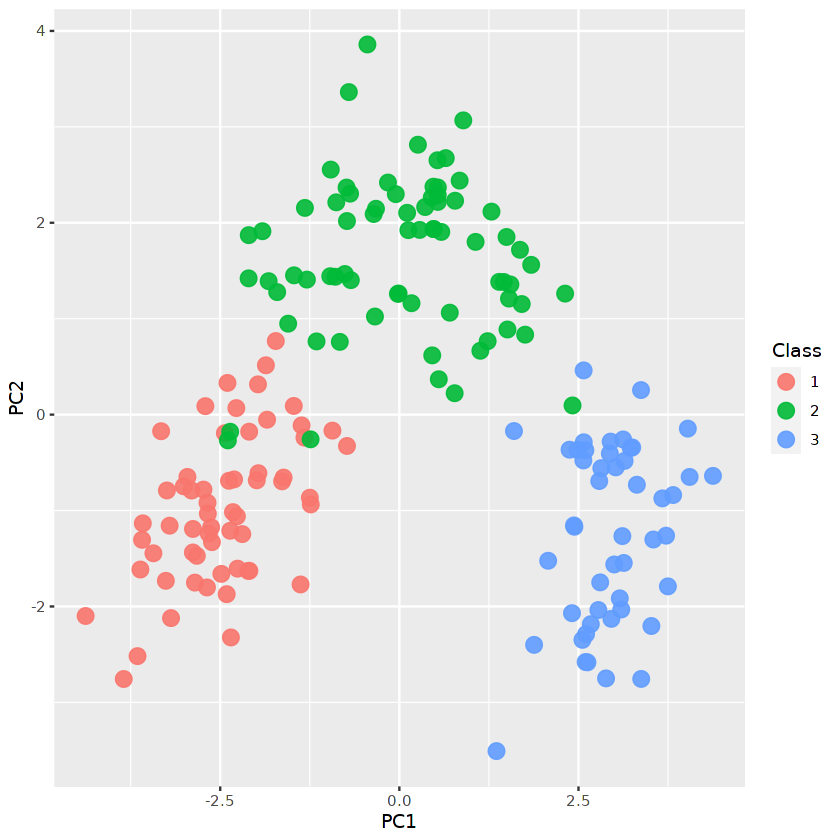

In [21]:
#3e
pc1_pc2 <- as.data.frame(wine_pca$x) %>%
  select(PC1, PC2) %>%
  mutate(class = wine_scaled$class)

ggplot(pc1_pc2, aes(x = PC1, y = PC2, color = factor(class))) +
  geom_point(size = 4, alpha = 0.9) +
  labs(color = "Class")

#3f
- After plotting PC1 vs PC2, it is clear that each of the classes makes mostly distinct groups. This indicates PC1 and PC2 cover most of the variability present between the classes. The PCA done was pretty good at reducing the differences and dimensionality to show the patterns available. 

#3g
- An example where PCA would fail is in voltage traces because the largest variance typically occurs as a result of changes from baseline as opposed to actual spikes in the data. Additionally, this data is collected over time and the differences in time may also be considered to be variance, impacting the PCA completed.

#3h
- A vector space refers to multiple vectors which can be added while a manifold refers to a similar nonlinear structure more locally.
- These apply to T-SNE because T-SNE allows for the nonlinear local vectors like in a manifold while PCA refers to the processing in the vector space.

## Question 4
#### a) Perform T-SNE
Set `seed = 123`.  
*Hint:* Subset your PCA results to PC1–PC10, add the class variable back in, remove duplicates, then perform T-SNE.

#### b) Plot the results in 2D
*Hint:* Convert your T-SNE results to a tibble and add back the class variable from your scaled data set using a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### c) Why didn't we stop at PCA?


#### d) What other types of data does this workflow make sense for?



In [26]:
#4a
set.seed(123)

pc1_pc10 <- as.data.frame(wine_pca$x) %>%
  select(PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, PC10) %>%
  mutate(class = wine_scaled$class)

tsne_out <- Rtsne(pc1_pc10, dims = 2, perplexity = 30, verbose = FALSE, check_duplicates = FALSE)


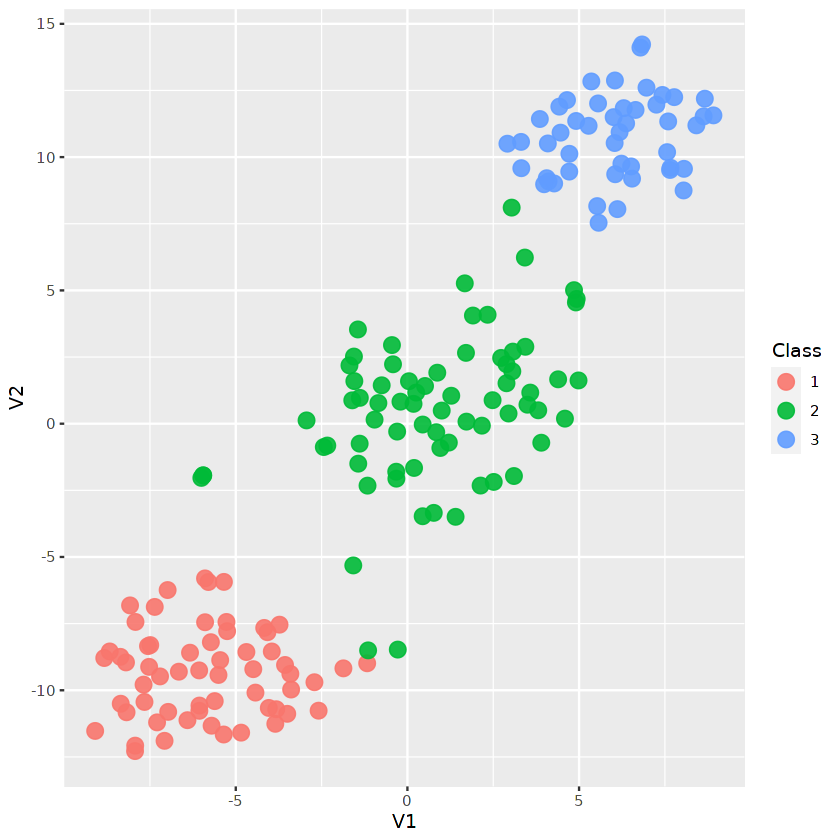

In [32]:
#4b

wine_tsen <- as_tibble(tsne_out$Y) %>%
  rename(X = V1, Y = V2) %>%
  mutate(class = pc1_pc10$class)

ggplot(wine_tsne, aes(x = V1, y = V2, color = factor(class))) +
  geom_point(size = 4, alpha = 0.9) +
  labs(color = "Class") 

#4c
- We did not stop at PCA because some of the variables are nonlinear, so they were not being included in the PCA processing done. In order to ensure the variables with nonlinear variance were included, we needed to complete T-SNE. Additionally, T-SNE allows for optimization of training data which is used with visualizations instead of just for processing.

#4d
- This is useful for multidimensional scaling, such as with text embedding or neural data that may have several correlated variables in a nonlinear space.